In [72]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
from src.clasterization import clasterize
from src.fetch_comments import fetch_comments
from src.embed import embed
from src.embed import model_names as embed_model_names
from src.sampling import sample_from_claster as sample

In [74]:
comments = fetch_comments(id='L_Guz73e6fw', max_result=3000, max_len=200)

In [75]:
embed_model_names

['SentenceTransformer/bert-base-nli-mean-tokens']

In [76]:
embeddings = embed(model_name=embed_model_names[0], sentences=comments)

embeddings.shape

(3001, 768)

In [77]:
from collections import Counter

clasters = clasterize(method_name='kmeans', embeddings=embeddings, n_clusters=5, n_init=10)

counts = Counter(clasters)

# print 

claster_inds = {claster for claster in clasters}

for claster, count in counts.items():
    print(f'Claster {claster} has {count} comments')

Claster 3 has 735 comments
Claster 1 has 515 comments
Claster 0 has 387 comments
Claster 4 has 929 comments
Claster 2 has 435 comments


In [78]:
# sample comments from claster

for ind in claster_inds:
    print(f'Claster {ind}')
    inds = clasters == ind
    comments_claster = [comment for comment, ind in zip(comments, inds) if ind]
    embeddings_claster = embeddings[inds]

    samples = sample(embeddings_claster, comments_claster, n_samples=5)

    for comment in samples:
        print(comment)
        print('-' * 10)
        pass

    print("=" * 100)

Claster 0
Make us whole.
----------
I already know bro to late
----------
Tony Hinchcliffs twin😅
----------
Spark 🎊.
----------
ID stamp your GPT . . .  out of many!
----------
Claster 1
Thank you very much for ChatGPT.  Especially great for non-native speakers ❤️ 

But it would be even more legendary if he could explain and narrate YouTube podcasts or Twitter videos in other language
----------
10:57  I busted up laughing when he said “able to predict whats gonna come out the other end”     struck me funny thats all. I’m a funny guy and I like potty humor 💩
----------
"it's nice to know, this is a tool very much in my control"

Let's hope the sentiment of this comment ages well.
----------
Probably one of the best interviews I've listened to.
----------
Sam's take on things is just so well considered and balanced. Much more of this is needed in leadership. If was a "better CEO" like he mentioned, a cheerleader of AI, I'd be very concerned.
----------
Claster 2
why Spotify do not work?

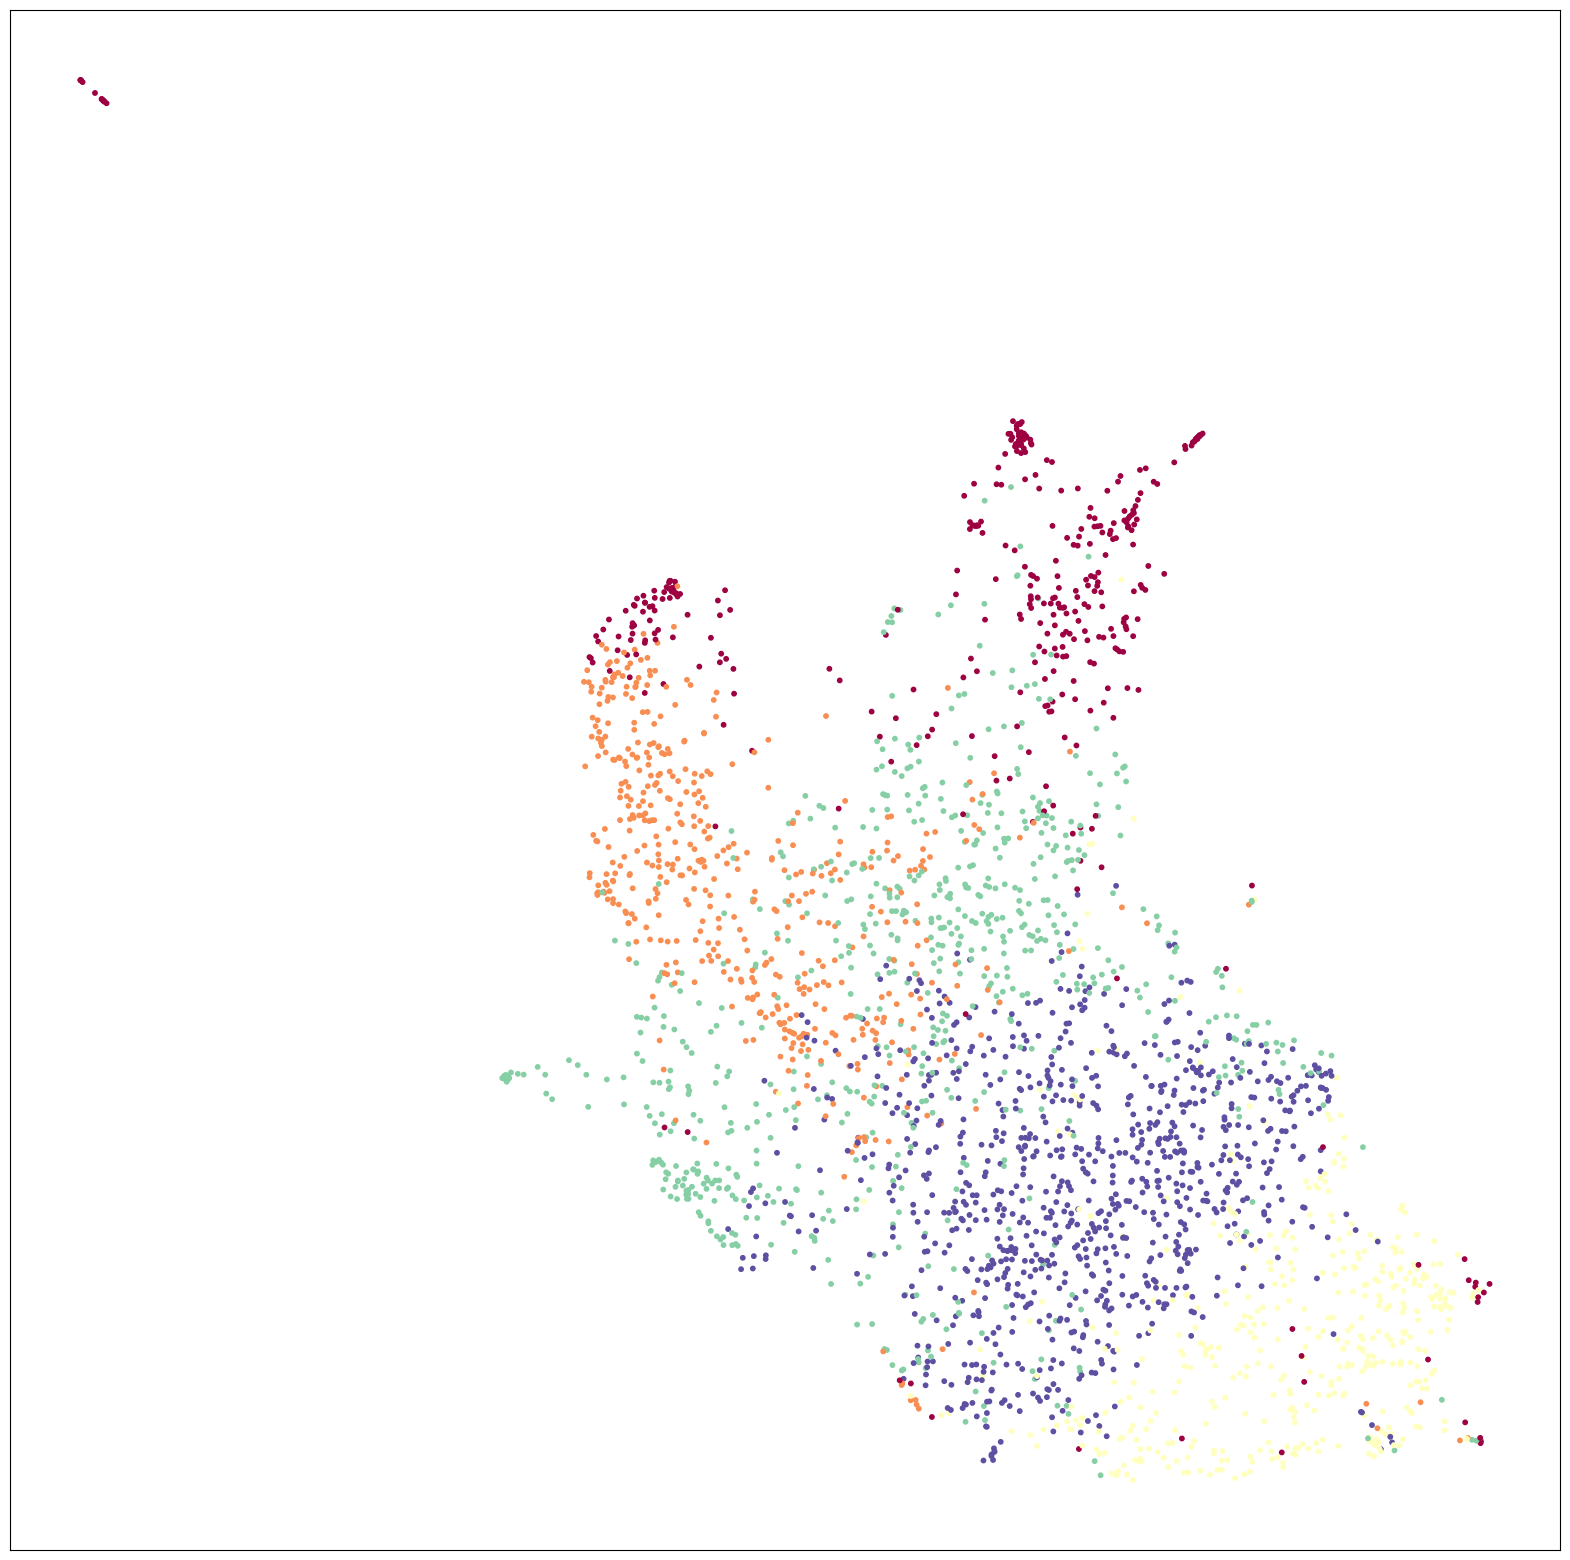

In [79]:
# UMAP visualization
import umap

umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clasters, s=10, cmap='Spectral')
plt.xticks([])
plt.yticks([])
plt.show()